<a href="https://colab.research.google.com/github/Strojove-uceni/23206-final-sign-language-recognition-in-video/blob/main/data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import math
import sys
import cv2
import io

from google.colab import drive

# Connect to Google Drive

In [13]:
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/SU2/data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load data informations

In [3]:
df_train = pd.read_csv(path + "/train.csv", sep=",")
df_train.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


# Load one file in linked repository

In [30]:
class Sign:
  def __init__(self, path, participant_id, sequence_id, sign):
    self.path = path + "/train_landmark_files/" + str(participant_id) + "/" + str(sequence_id) + ".parquet"
    self.participant_id = participant_id
    self.sequence_id = sequence_id
    self.sign = sign
    self.df = pd.read_parquet(self.path, engine='pyarrow')

  def display(self):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(self.df.x.values, self.df.y.values, self.df.z.values, c='r', marker='o') # You can customize the color and marker

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    plt.show()

In [31]:
test = Sign(path, 2044, 1001950812, "milk")

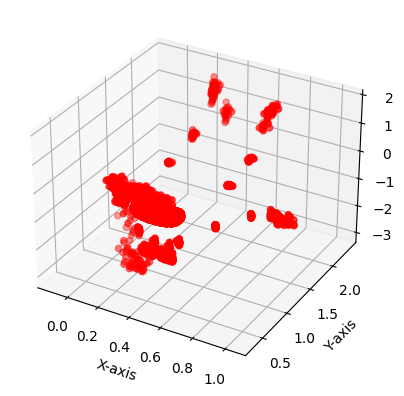

In [32]:
test.display()

# Load all files in linked repository

(Načtení jedné složky trvá zatraceně dlouho)

In [43]:
class Data:
  def __init__(self):
    self.data = []

  def read_all(self, df):
    for participant_folder in os.listdir(path + "/train_landmark_files/"):
      path_folder = path + "/train_landmark_files/" + participant_folder + "/"
      for file_name in os.listdir(path_folder):
        file_num = int(file_name.split(".")[0])
        df_row = df_train[(df_train.participant_id == int(participant_folder)) & (df_train.sequence_id == file_num)]
        self.data.append(Sign(path, int(participant_folder), file_num, df_row.sign.values[0]))

In [44]:
# Dictionary for data
data = Data()
data.read_all(df_train)

In [46]:
data.data[0].df

,frame,row_id,type,landmark_index,x,y,z
0,22,22-face-0,face,0,0.457850,0.450046,-0.051791
1,22,22-face-1,face,1,0.447535,0.406658,-0.074625
2,22,22-face-2,face,2,0.452214,0.423228,-0.044922
3,22,22-face-3,face,3,0.440912,0.374283,-0.044314
4,22,22-face-4,face,4,0.447275,0.394827,-0.076723
...,...,...,...,...,...,...,...
9769,39,39-right_hand-16,right_hand,16,0.413427,0.593392,-0.109041
9770,39,39-right_hand-17,right_hand,17,0.281950,0.767291,-0.087446
9771,39,39-right_hand-18,right_hand,18,0.342155,0.710287,-0.115543
9772,39,39-right_hand-19,right_hand,19,0.379627,0.713385,-0.110798
